# Algoritmo general de Gradient Boosting 

**Entrada:** Datos $\{(x_i, y_i)\}_{i=1}^n$, y una **función de pérdida diferenciable** $L(y_i, F(x))$


## Paso 1: Inicializar el modelo con un valor constante

$$
F_0(x) = \arg\min_\gamma \sum_{i=1}^{n} L(y_i, \gamma)
$$

## Paso 2: Para $m = 1$ hasta $M$:

### (A) Calcular los residuos pseudo:
$$
r_{im} = - \left[ \frac{\partial L(y_i, F(x_i))}{\partial F(x_i)} \right]_{F(x)=F_{m-1}(x)} \quad \text{para } i = 1 \dots n
$$

### (B) Ajustar un árbol de regresión a los valores $r_{im}$ y crear regiones $R_{jm}$, para $j = 1 \dots J_m$

### (C) Para cada región $j = 1 \dots J_m$, calcular:

$$
\gamma_{jm} = \arg\min_\gamma \sum_{x_i \in R_{jm}} L(y_i, F_{m-1}(x_i) + \gamma)
$$


### (D) Actualizar el modelo:

$$
F_m(x) = F_{m-1}(x) + \nu \sum_{j=1}^{J_m} \gamma_{jm} \cdot I(x \in R_{jm})
$$

> Donde $\nu$ es la tasa de aprendizaje (*learning rate*)  
> e $I(x \in R_{jm})$ es la función indicadora.


## Paso 3: Devolver el modelo final $F_M(x)$


 ### Traducción a modelos de regresión

Inicializamos la estimación con el promedio

$$F_0(X) = \hat{y}$$

Repita hasta converger
- Hacemos un loop (total de árboles) en cada pasao obtenemos los _residuales_ (valor real - valor predicho)

   $r_i = y_i - F_{m-1}(x_i)$

- Ajustamos un árbol de regresión para predecir los residuales 
- La predicción del árbol anterior será el promedio de los residuales de cada hoja 
- modelo actualizado = modelo anterior + $\nu$ nuevo árbol
$$F_m(x) = F_{m - 1}(x) + \nu (\text{nuevo árbol})$$





### Ejemplo de implementación 

Iteración 1, MSE: 0.3680
Iteración 2, MSE: 0.3022
Iteración 3, MSE: 0.2483
Iteración 4, MSE: 0.2049
Iteración 5, MSE: 0.1694
Iteración 6, MSE: 0.1397
Iteración 7, MSE: 0.1152
Iteración 8, MSE: 0.0950
Iteración 9, MSE: 0.0785
Iteración 10, MSE: 0.0651
Iteración 11, MSE: 0.0539
Iteración 12, MSE: 0.0448
Iteración 13, MSE: 0.0373
Iteración 14, MSE: 0.0312
Iteración 15, MSE: 0.0263
Iteración 16, MSE: 0.0222
Iteración 17, MSE: 0.0188
Iteración 18, MSE: 0.0160
Iteración 19, MSE: 0.0138
Iteración 20, MSE: 0.0120
Iteración 21, MSE: 0.0103
Iteración 22, MSE: 0.0090
Iteración 23, MSE: 0.0078
Iteración 24, MSE: 0.0070
Iteración 25, MSE: 0.0062


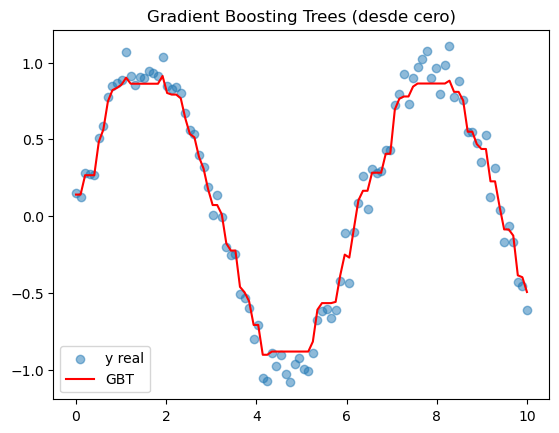

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# 1. Simulamos un dataset
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, size=X.shape[0])

# 2. Inicializamos
n_estimators = 25
learning_rate = 0.1
max_depth = 4

# Guardamos los árboles
trees = []
predictions = np.full_like(y, fill_value=y.mean())  # F0(x) = promedio de y
initial_prediction = y.mean()

# 3. Loop de boosting
for m in range(n_estimators):
    # Calcular residuales
    residuals = y - predictions

    # Ajustar árbol a los residuales
    tree = DecisionTreeRegressor(max_depth=max_depth)
    tree.fit(X, residuals)

    # Predecir los residuales
    update = tree.predict(X)

    # Actualizar predicción
    predictions += learning_rate * update

    # Guardar el árbol
    trees.append(tree)

    print(f"Iteración {m+1}, MSE: {mean_squared_error(y, predictions):.4f}")

# 4. Visualización final
plt.scatter(X, y, label="y real", alpha=0.5)
plt.plot(X, predictions, color='red', label="GBT")
plt.title("Gradient Boosting Trees (desde cero)")
plt.legend()
plt.show()
